In [1]:
import numpy as np
import h5py
import time
import pandas as pd
import matplotlib.pyplot as plt
import glob
import scipy
import pickle as pkl
import matplotlib as mpl
from astropy.coordinates import SkyCoord
from astropy import units as u

In [2]:
def flux2mag(flux):
    return -2.5 * np.log10(flux) + 30

In [3]:
#wide = pd.read_csv('/project/chihway/raulteixeira/data/BalorgOfTheDECADE_v01_29072023_cells_wide.csv.gz')
deep = pd.read_csv('/project/chihway/raulteixeira/data/deep_fields_nice_n_z.csv.gz')

In [25]:
len(deep_alex)

727471

In [14]:
deep_alex = pd.read_csv('/home/raulteixeira/scratch-midway2/deepfields_with_redshifts.csv.gz')

In [22]:
np.isfinite(deep_alex['Z']).sum()

179003

In [23]:
np.isfinite(deep['Z']).sum()

158055

In [13]:
deep.columns

Index(['Unnamed: 0', 'ID', 'RA', 'DEC', 'KNN_CLASS', 'BDF_FLUX_DERED_CALIB_U',
       'BDF_FLUX_DERED_CALIB_G', 'BDF_FLUX_DERED_CALIB_R',
       'BDF_FLUX_DERED_CALIB_I', 'BDF_FLUX_DERED_CALIB_Z',
       'BDF_FLUX_DERED_CALIB_J', 'BDF_FLUX_DERED_CALIB_H',
       'BDF_FLUX_DERED_CALIB_KS', 'BDF_FLUX_ERR_DERED_CALIB_U',
       'BDF_FLUX_ERR_DERED_CALIB_G', 'BDF_FLUX_ERR_DERED_CALIB_R',
       'BDF_FLUX_ERR_DERED_CALIB_I', 'BDF_FLUX_ERR_DERED_CALIB_Z',
       'BDF_FLUX_ERR_DERED_CALIB_J', 'BDF_FLUX_ERR_DERED_CALIB_H',
       'BDF_FLUX_ERR_DERED_CALIB_KS', 'BDF_MAG_DERED_CALIB_I', 'cells', 'u-g',
       'g-r', 'r-i', 'i-z', 'z-J', 'J-H', 'H-KS', 'i', 'u-i', 'g-i', 'z-i',
       'j-i', 'h-i', 'ks-i', 'zspec', 'paus_z', 'cosmos_z', 'Z', 'good_Z'],
      dtype='object')

In [23]:
wide['ID']=wide.coadd_object_id
#wide_deep = pd.read_csv('/project/chihway/raulteixeira/data/BalorgOfTheDECADE_v01_29072023_cells_wide_deep.csv.gz')

In [5]:
#cells = np.load('/project/chihway/raulteixeira/data/som_balrog_wide_v01_29072023_48x48.npz')['cells']
cells = np.load('/project/chihway/raulteixeira/data/som_balrog_wide_v01_29072023_26x26.npz')['cells']

In [ ]:
# now. classify those galaxies in the wide SOM (OK)
# when dhayaa sends new catalog. match with deep field catalog with astropy RA, DEC (Dhayaa is working on it!)
# 2. calculate the rate each object passes through gold cuts
    # 2.1 make n(z)'s (including tomo bins) (use cosmos z column for p(z|c),
    # weighted by the probabilities of points 1. and 2.)
    # 2.2 weight the p(c) by these weights

# 3 calculate joint probability of p(c,c_hat)

# IDs that were used for the injection of the catalog

In [ ]:
# p(c_hat|detected,c)*p(detected|c) # both detection and gold cut are embedded in this right hand probability

['Ai', 'Ar', 'Az', 'FLUX_i', 'FLUX_i_ERR', 'FLUX_r', 'FLUX_r_ERR', 'FLUX_z', 'FLUX_z_ERR', 'Truth_ind', 'coadd_object_id', 'd_arcsec', 'dec', 'detected', 'ra', 'true_FLUX_i', 'true_FLUX_r', 'true_FLUX_z', 'true_dec', 'true_ra']


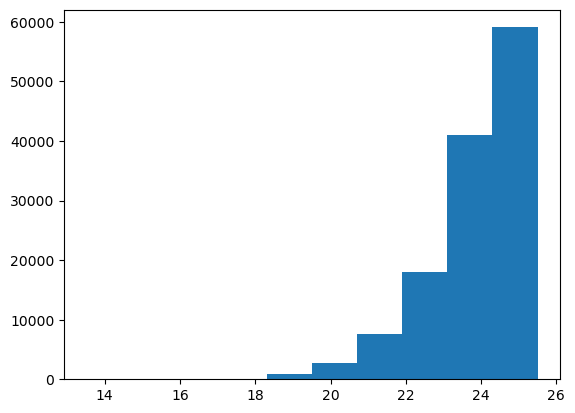

In [15]:
with h5py.File('/project/chihway/dhayaa/DECADE/photoz_Balrog/BalorgOfTheDECADE_v01_29072023.hdf5', 'r') as f:
    print(list(f.keys()))
    x = np.array(f['true_FLUX_i'])
    plt.hist(flux2mag(x));

In [16]:
balrogish_df = pd.read_csv('/project/chihway/raulteixeira/data/BalorgOfTheDECADE_v01_29072023.csv.gz')

In [8]:
# balrogish_df = pd.DataFrame()
# with h5py.File('/project/chihway/dhayaa/DECADE/photoz_Balrog/BalorgOfTheDECADE_v01_29072023.hdf5', 'r') as f:
#     for key in list(f.keys()):
#         balrogish_df[key]=np.array(f[key])
        

In [19]:
len(balrogish_df), cells.size

(129600, 129600)

In [20]:
balrogish_df['cells']=cells

In [21]:
wide = balrogish_df

In [26]:
wide.to_csv('/project/chihway/raulteixeira/data/BalorgOfTheDECADE_v01_29072023_cells_wide_26x26.csv.gz')
wide_deep.to_csv('/project/chihway/raulteixeira/data/BalorgOfTheDECADE_v01_29072023_cells_wide_deep_26x26.csv.gz')

In [24]:
wide_deep = wide.merge(deep, on='ID', how='left')

In [25]:
wide_deep

,Unnamed: 0_x,Ai,Ar,Az,FLUX_i,FLUX_i_ERR,FLUX_r,FLUX_r_ERR,FLUX_z,FLUX_z_ERR,...,g-i,z-i,j-i,h-i,ks-i,zspec,paus_z,cosmos_z,Z,good_Z
0,0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,0.193690,-0.173493,-0.558242,-0.818856,-0.962420,NaN,NaN,NaN,NaN,NaN
1,1,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,0.772876,-0.625402,-2.193225,-2.598887,-3.219124,NaN,NaN,1.973052,1.973052,NaN
2,2,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,0.643457,-0.371089,-0.908706,-1.297617,-1.078925,NaN,NaN,NaN,NaN,NaN
3,3,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,3.071883,-0.602563,-1.299758,-1.573097,-1.914321,NaN,NaN,NaN,NaN,NaN
4,4,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,0.726857,-0.158083,-0.742776,-1.082518,-1.181997,0.3455,NaN,NaN,0.345500,0.3455
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129595,129595,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
129596,129596,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,0.196881,-0.517510,-1.155400,-1.264382,-1.563148,NaN,NaN,NaN,NaN,NaN
129597,129597,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,0.113123,0.024175,-0.888492,-1.147916,-0.224646,NaN,NaN,NaN,NaN,NaN
129598,129598,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
wide_deep.to_csv('/project/chihway/raulteixeira/data/BalorgOfTheDECADE_v01_29072023_cells_wide_deep.csv.gz')

In [33]:
df.to_csv('/project/chihway/raulteixeira/data/BalorgOfTheDECADE_v01_29072023_cells_wide_deep.csv.gz')

In [53]:
(~(df.p_gal*df.detected==df.p_gal)).sum()

1118

In [41]:
sim_ids = balrogish_df['ID']

In [45]:
np.isin(sim_ids, deep_ids)

array([ True,  True,  True, ...,  True, False,  True])

In [42]:
deep_ids = deep_SOM['ID']

In [33]:
balrogish_df['ID']=balrogish_df['coadd_object_id']

In [10]:
balrogish_df.to_csv('/project/chihway/dhayaa/DECADE/photoz_Balrog/BalorgOfTheDECADE_v01_29072023.csv.gz')

In [10]:
balrogish_df = pd.read_csv('/project/chihway/dhayaa/DECADE/photoz_Balrog/BalorgOfTheDECADE_v01_29072023.csv.gz')

In [16]:
balrogish_df['cells']=np.nan

In [17]:
balrogish_df

,Unnamed: 0,Ai,Ar,Az,FLUX_i,FLUX_i_ERR,FLUX_r,FLUX_r_ERR,FLUX_z,FLUX_z_ERR,...,d_arcsec,dec,detected,ra,true_FLUX_i,true_FLUX_r,true_FLUX_z,true_dec,true_ra,cells
0,0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,12.598839,NaN,False,NaN,102.411680,99.272020,120.15637,-28.900414,222.58750,NaN
1,1,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,3.626037,NaN,False,NaN,126.070755,88.166210,224.27202,-28.900450,222.58052,NaN
2,2,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,1.116378,NaN,False,NaN,126.441510,124.469284,177.96120,-28.900528,222.57353,NaN
3,3,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,5.477405,NaN,False,NaN,529.928040,178.134500,923.08580,-28.900524,222.56659,NaN
4,4,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,16.737488,NaN,False,NaN,885.591700,698.014700,1024.39370,-28.900497,222.55963,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129595,129595,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,2.044118,NaN,False,NaN,71.072740,104.585920,170.06418,8.945423,232.32700,NaN
129596,129596,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,11.448372,NaN,False,NaN,238.324970,227.967820,383.86047,8.945434,232.32082,NaN
129597,129597,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,6.631809,NaN,False,NaN,107.557550,109.761680,105.18910,8.945440,232.31464,NaN
129598,129598,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,5.027608,NaN,False,NaN,126.485020,94.565990,193.73064,8.945440,232.30850,NaN


In [27]:
balrogish_df.to_csv('/project/chihway/raulteixeira/data/BalorgOfTheDECADE_v01_29072023_cells_wide.csv.gz')

In [30]:
balrogish_df['ID'] = balrogish_df['coadd_object_id']

In [6]:
df.to_csv('/project/chihway/raulteixeira/data/BalorgOfTheDECADE_v01_29072023_DET.csv.gz')

In [28]:
deep_SOM

,Unnamed: 0,ID,RA,DEC,KNN_CLASS,BDF_FLUX_DERED_CALIB_U,BDF_FLUX_DERED_CALIB_G,BDF_FLUX_DERED_CALIB_R,BDF_FLUX_DERED_CALIB_I,BDF_FLUX_DERED_CALIB_Z,...,g-i,z-i,j-i,h-i,ks-i,zspec,paus_z,cosmos_z,Z,good_Z
0,0,692581195,52.901547,-28.866868,1.0,78.873091,90.598396,150.538655,299.158525,604.705644,...,1.296952,-0.764107,-1.621641,-2.167968,-2.400146,NaN,NaN,NaN,NaN,NaN
1,1,692581196,52.900143,-28.866868,1.0,427.218832,428.159639,533.924158,623.754924,930.088708,...,0.408521,-0.433776,-0.669181,-0.913292,-1.065940,NaN,NaN,NaN,NaN,NaN
2,2,692581197,52.919675,-28.867296,1.0,204.186270,259.924072,640.058928,923.667161,990.715877,...,1.376673,-0.076084,-0.504671,-0.420516,-0.845662,NaN,NaN,NaN,NaN,NaN
3,4,692581244,52.775273,-28.867263,1.0,30.073269,29.574921,83.823448,123.895966,123.353058,...,1.555334,0.004768,-1.101095,-0.197415,-1.925934,NaN,NaN,NaN,NaN,NaN
4,5,692581245,52.806489,-28.867570,1.0,482.933499,471.033683,666.071153,1136.945773,1345.197659,...,0.956719,-0.182616,-0.463813,-0.517894,-0.589216,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
610323,2826973,698430348,36.792257,-4.959126,1.0,36.794575,36.615140,113.136962,199.582800,329.359765,...,1.841156,-0.543869,-1.357997,-1.884968,-2.098736,NaN,NaN,NaN,NaN,NaN
610324,2826974,698430349,36.936774,-4.958946,1.0,68.959445,65.505742,173.253276,213.351412,247.441472,...,1.282040,-0.160942,-0.306512,-0.441242,-0.695710,NaN,NaN,NaN,NaN,NaN
610325,2826980,698430445,36.858459,-4.959729,1.0,171.296154,420.164719,816.936807,1086.845179,1158.868204,...,1.031870,-0.069666,-0.314095,-0.439288,-0.368006,NaN,NaN,NaN,NaN,NaN
610326,2826983,698430493,36.867956,-4.961262,1.0,62.842978,138.970283,445.022129,1069.344794,1567.993989,...,2.215490,-0.415567,-1.363364,-1.730909,-2.207312,NaN,NaN,NaN,NaN,NaN


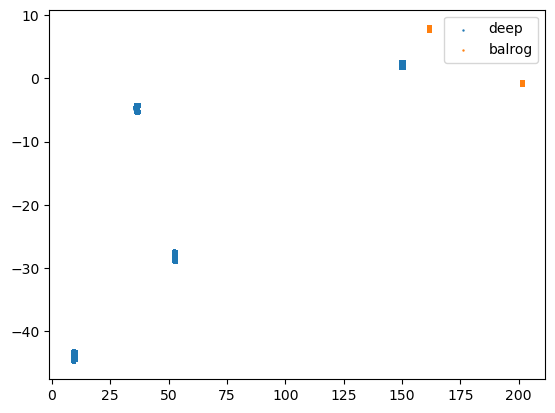

In [20]:
plt.scatter(deep_SOM['RA'], deep_SOM['DEC'], s=.5, label='deep')
plt.scatter(balrogish_df['true_ra'], balrogish_df['true_dec'], s=.5, label='balrog')
plt.legend()
plt.show()

In [17]:
# Match spectra to DELVE catalog
balrog_cd = SkyCoord(ra=balrogish_df['true_ra'].values*u.degree, dec=balrogish_df['true_dec'].values*u.degree)
deep_cd = SkyCoord(ra=deep_SOM['RA'].values*u.deg, dec=deep_SOM['DEC'].values*u.deg)
idx, d2d, d3d = deep_cd.match_to_catalog_sky(balrog_cd)
good_matches = d2d < 1.0*u.arcsec

print(len(np.unique(idx[good_matches])), np.count_nonzero(good_matches))

0 0


In [19]:
def goldish_cut(df):
    # count how many galaxies pass the metacal cuts
    # histogram to compare distributions 2d contour triangle plot
    #print(df)
    flux_r, flux_i, flux_z = df['FLUX_r'], df['FLUX_i'], df['FLUX_z']
    flux_err_r, flux_err_i, flux_err_z = df['FLUX_r_ERR'], df['FLUX_i_ERR'],  df['FLUX_z_ERR']

    # flux_err_r, flux_err_i, flux_err_z = np.array(f['mcal_flux_err_noshear']).T
    mag_r = flux2mag(flux_r)
    mag_i = flux2mag(flux_i)
    mag_z = flux2mag(flux_z)

    mcal_pz_mask = ((mag_i < 23.5) & (mag_i > 18) & 
                    (mag_r < 26)   & (mag_r > 15) & 
                    (mag_z < 26)   & (mag_z > 15) & 
                    (mag_r - mag_i < 4)   & (mag_r - mag_i > -1.5) & 
                    (mag_i - mag_z < 4)   & (mag_i - mag_z > -1.5))

    SNR = np.sqrt((flux_i/flux_err_r)**2 + (flux_r/flux_err_r)**2 + (flux_z/flux_err_z)**2) #calculate another way, divide flux/fluxerr

    #Metacal cuts based on DES Y3 ones (from here: https://des.ncsa.illinois.edu/releases/y3a2/Y3key-catalogs)
    SNR_Mask = (SNR > 10) & (SNR < 1000)

    Mask = mcal_pz_mask & SNR_Mask
    return Mask.sum()/Mask.size

In [20]:
cols = ["FLUX_r", "FLUX_i", "FLUX_z", "FLUX_r_ERR", "FLUX_i_ERR", "FLUX_z_ERR", 'Truth_ind']
group = balrogish_df[cols].groupby('Truth_ind')
#p_gal = [goldish_cut(gal_df) for gal_id, gal_df in group]


In [109]:
np.unique(balrogish_df['Truth_ind']).size

150755

In [8]:
deep_SOM.columns

NameError: name 'deep_SOM' is not defined

In [129]:
import astropy
from astropy.table import Table

table = Table.read('/project/chihway/dhayaa/DECADE/input_cosmos_v4.fits')

In [136]:
table

des_id,bdf_hlr,bdf_fracdev,mask_flags,bdf_g1,bdf_g2,flux_u,flux_g,flux_r,flux_i,flux_z,flux_Y,flux_J,flux_H,flux_Ks,mag_u,mag_g,mag_r,mag_i,mag_z,mag_Y,mag_J,mag_H,mag_Ks,flux_u_dered,flux_g_dered,flux_r_dered,flux_i_dered,flux_z_dered,flux_Y_dered,flux_J_dered,flux_H_dered,flux_Ks_dered,mag_u_dered,mag_g_dered,mag_r_dered,mag_i_dered,mag_z_dered,mag_Y_dered,mag_J_dered,mag_H_dered,mag_Ks_dered,laigle_number,photoz,zp_2,zpdf_l68,zpdf_h68,class,isgal
int64,float64,float64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,float64,float64,float64,float64,float64,int64
1,0.20668657814794753,0.6795226360854888,0,0.020421950121734544,-0.13187350301222509,5.261443579509389,22.180110997341203,92.72985751714394,273.0792695212795,634.8053585898259,706.7026515213317,1189.991422017781,1747.228804846856,2446.4755802428367,28.197237705870005,26.635090712034756,25.08195101881514,23.90927816885826,22.99339853971669,22.876908198064818,22.311140422955166,21.894125547823403,21.52864778709785,5.619991043159619,23.387442059964087,96.0906651312713,280.3011218598625,647.5625788845532,718.7611529494701,1204.0305073806448,1760.094670597547,2459.0434387320206,28.125660941464115,26.57754318852877,25.0432970011432,23.880937910107196,22.971795640120593,22.858538508358105,22.29840627227352,21.88615993016297,21.523084498573102,785345,1.3867000341415405,-99.0,1.371500015258789,1.403499960899353,0.0,1
2,0.1162436065735026,0.989133789192476,0,-0.005648063816841057,0.011836728990922541,78.46638659892372,102.67417539289694,165.53370239972017,349.3638926172865,417.7966556930114,473.9642069663711,580.6772868941229,610.1081158946072,741.1073689215235,25.263290865809687,24.971346941023924,24.452783928042212,23.6418049553617,23.447587601769385,23.310636135814455,23.090162902496616,23.036482994539192,22.82529717117108,83.81974824720486,108.26945608232288,171.53996338145947,358.6136272083393,426.2022861842127,482.0605947594188,587.5356061035695,614.6057367237097,744.9187975628231,25.191634119761577,24.91373511249558,24.414086717417398,23.613433028506403,23.425960562560377,23.292245919363317,23.077414522360872,23.028508475901088,22.8197276660905,787350,0.7876999974250793,-99.0,0.7576000094413757,0.8126999735832214,1.0,1
3,0.09122955577532912,0.417328293092781,0,0.06356821924319608,0.3516502658709596,99.85249170293882,93.85462386167978,88.68589495650032,128.56587335758744,146.25615777916292,294.2307641485195,231.83058134389427,233.3174292822136,324.30254450540315,25.001602733359384,25.068860816180226,25.130363617547722,24.72718573909254,24.5872145997262,23.828279800796928,24.087073189342632,24.08013204330328,23.722624109505354,106.6614326418158,98.96667838482631,91.90217142559541,131.96806709685447,149.19720672120997,299.2543856911761,234.56734453567384,235.03655380088998,325.969566657235,24.92998146827788,25.01127751425233,25.091685567916304,24.698827860647825,24.56559826918453,23.80989869029452,24.074331121590227,24.072161473262412,23.717057362175225,786354,1.1401000022888184,-99.0,1.1150000095367432,1.1648999452590942,1.0,1
9,1.5128997388651915,2.0704605791964843,0,-0.014019404918060219,-0.10804265001677968,399.3431918771223,409.52244933414914,534.2842219342446,1014.0746877296885,1327.7802785644008,1215.1340561302063,1530.1763228603124,1570.0050554906197,1903.8943968210538,23.496634287878457,23.469305714888886,23.180569127185777,22.484825143881586,22.192184465473428,22.28843951786782,22.03814630590837,22.010247372849296,21.800892860663787,426.32380347066163,431.62426065108593,553.4848615813536,1040.6676294601687,1354.240258531624,1235.694573194585,1548.078220646107,1581.4697062667215,1913.5936386971218,23.42565104542091,23.412235381411776,23.142235632634296,22.456719885493143,22.17076069935961,22.2702221515

In [21]:
import warnings
warnings.filterwarnings('ignore')
balrogish_df['p_gal']=np.zeros(len(balrogish_df))
t0 = time.time()
for i, (g_label, g) in enumerate(group):
    balrogish_df['p_gal'].loc[balrogish_df['Truth_ind']==g_label] = goldish_cut(g)
    if i%1000==0: 
        print(g_label)
        print(time.time()-t0)

9
0.229217529296875
7152
4.989903688430786
13696
9.584399938583374
20767
13.898723840713501
27858
18.296507358551025
35231
22.968443155288696
42039
27.225205659866333
49117
31.654363870620728
56124
36.037580490112305
62930
40.4950156211853
69992
45.00075960159302
76724
49.38657474517822
83407
54.10158443450928
90044
58.4582405090332
97091
62.78347897529602
103754
67.26181936264038
110503
71.80456686019897
117234
76.19897723197937
123966
80.55889129638672
130941
84.9053635597229
137889
89.41056108474731
144921
93.94833660125732
151583
98.37437343597412
158379
102.69282031059265
164911
107.33432674407959
171752
111.69269132614136
178689
116.2364432811737
185677
120.6701226234436
192468
125.12568259239197
199518
129.54953861236572
206784
133.98648238182068
213744
138.44741702079773
220695
142.94132256507874
227645
147.48064875602722
234598
151.90895986557007
241519
156.3127338886261
248417
160.9210422039032
255202
165.44676160812378
262195
170.14313101768494
268854
174.81703782081604
2759

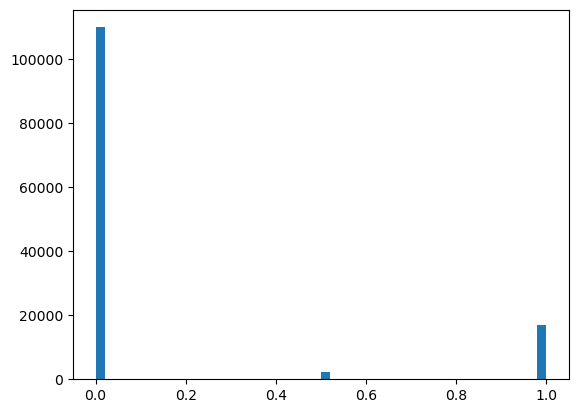

In [24]:
plt.hist(balrogish_df['p_gal'], bins=50);

In [29]:
balrogish_df['coadd_object_id']

0         698316262
1         712167777
2         697443896
3         698284925
4         697537883
            ...    
129595    691927777
129596    697403822
129597    697292159
129598    692006773
129599    698345533
Name: coadd_object_id, Length: 129600, dtype: int64

In [59]:
balrogish_df.to_csv('/project/chihway/raulteixeira/data/BalrogOfTheDECADE_07142023_pgal.csv.gz')

In [122]:
balrogish_df


,FLUX_i,FLUX_i_ERR,FLUX_r,FLUX_r_ERR,FLUX_z,FLUX_z_ERR,Truth_ind,d_arcsec,dec,detected,photoz,ra,true_FLUX_i,true_FLUX_r,true_FLUX_z,true_dec,true_ra,p_gal
0,NaN,NaN,NaN,NaN,NaN,NaN,117480,4.378589,NaN,False,3.6534,NaN,78.672142,51.077232,65.937981,7.964573,161.711945,0.00
1,NaN,NaN,NaN,NaN,NaN,NaN,12242,1.890150,NaN,False,0.6300,NaN,1831.073608,1423.404297,1962.333130,8.079800,161.346024,0.50
2,3674.358398,42.898518,2791.639160,37.759289,4129.496094,80.718437,28918,0.266510,8.223158,True,0.7113,161.263474,3866.267334,2743.958008,4387.424316,8.223190,161.263550,1.00
3,NaN,NaN,NaN,NaN,NaN,NaN,64619,3.715463,NaN,False,0.7546,NaN,215.656754,155.770676,333.382812,7.640338,161.466522,0.25
4,2045.948242,45.186848,1162.476807,31.501141,2615.239502,63.404156,3386,0.453646,7.622824,True,0.4392,161.560501,312.163147,251.494522,357.784882,7.622710,161.560440,0.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320478,1692.476685,47.669186,766.508240,36.271488,2699.342773,74.568634,20475,0.497477,-0.858802,True,0.7267,201.100540,982.898071,372.528107,1533.554810,-0.858666,201.100510,1.00
320479,190.355942,32.060028,164.519684,20.299810,321.170868,50.339027,4704,0.065225,-0.878835,True,1.4731,201.284439,291.973999,156.225067,484.093933,-0.878838,201.284424,0.50
320480,NaN,NaN,NaN,NaN,NaN,NaN,89115,9.096172,NaN,False,0.8706,NaN,172.154312,104.772537,224.230606,-0.828798,201.272568,0.00
320481,NaN,NaN,NaN,NaN,NaN,NaN,64993,3.768605,NaN,False,1.6004,NaN,168.023209,143.820755,172.117081,-0.569146,201.425995,0.00


In [97]:
goldish_cut(g)

0.5

In [ ]:
p_gal

In [24]:
list(group)

[(0,
              FLUX_i  FLUX_i_ERR      FLUX_r  FLUX_r_ERR       FLUX_z  \
  55980   422.009308   52.120270  159.950256   28.455009  1005.576050   
  195933  380.719574   32.625492  207.490372   29.970152   941.027649   
  
          FLUX_z_ERR  Truth_ind  d_arcsec       dec  detected  photoz  \
  55980    79.404762          0  0.214955  8.124608      True  1.3867   
  195933   59.656506          0  0.064914 -0.878906      True  1.3867   
  
                  ra  true_FLUX_i  true_FLUX_r  true_FLUX_z  true_dec  \
  55980   161.486084   273.079285    92.729858   634.805359  8.124611   
  195933  201.111786   273.079285    92.729858   634.805359 -0.878890   
  
             true_ra  
  55980   161.486023  
  195933  201.111801  ),
 (1,
              FLUX_i  FLUX_i_ERR      FLUX_r  FLUX_r_ERR      FLUX_z  \
  222670  415.087128   40.752716  215.231384   23.572899  486.577942   
  237599  526.134827   30.605877  248.674133   22.612272  604.596313   
  
          FLUX_z_ERR  Truth_ind  d

['FLUX_i', 'FLUX_i_ERR', 'FLUX_r', 'FLUX_r_ERR', 'FLUX_z', 'FLUX_z_ERR', 'Truth_ind', 'd_arcsec', 'dec', 'detected', 'photoz', 'ra', 'true_FLUX_i', 'true_FLUX_r', 'true_FLUX_z', 'true_dec', 'true_ra']


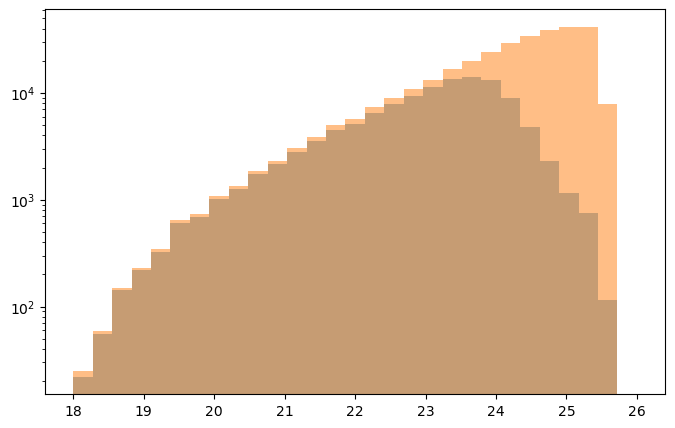

Text(0, 0.5, 'Output')

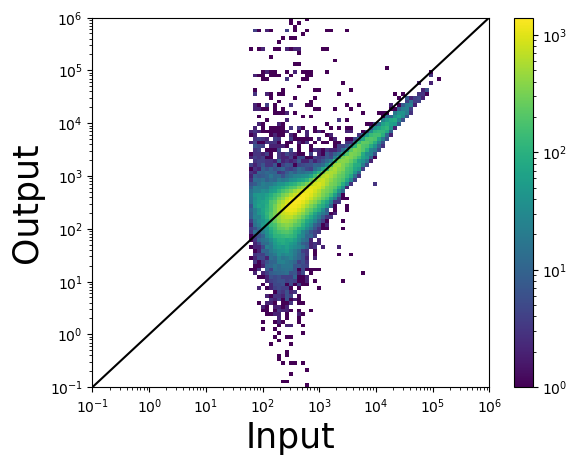

In [15]:
with h5py.File('/project/chihway/dhayaa/DECADE/BalrogOfTheDECADE_07142023.hdf5', 'r') as f:
    
    gal_true_id = np.array(f['Truth_ind']) #Unique ID of the input galaxy that was simulated
    y     = np.array(f['FLUX_r']) #Observed FLUX_r (also have i and z)
    y_r     = np.array(f['FLUX_r'])
    y_i     = np.array(f['FLUX_i'])
    y_z     = np.array(f['FLUX_z'])
    y_err = np.array(f['FLUX_r_ERR']) #Observed FLUX_r error
    x = np.array(f['true_FLUX_r']) #True input FLUX
    
    #Boolean array. Whether this input galaxy was detected or not
    #It's detected if we find a match in output catalog located within
    #0.5 arcsec of where we injected the galaxy.
    #If a galaxy isnt detected, its entries for observed properties is np.NaN
    s = np.array(f['detected'])
        
    #offset between position of where we input the galaxy and where we find it
    offset = np.array(f['d_arcsec'])
    
    print(list(f.keys()))
    x = np.array(f['true_FLUX_i'])
    plt.figure(figsize=(8,5))
    plt.yscale('log')
    plt.hist(flux2mag(x), weights=s.astype(float), alpha=.5, bins=np.linspace(18,26,30))
    plt.hist(flux2mag(x), alpha=.5, bins=np.linspace(18,26,30))
    plt.show()
    

#Some plotting :P
plt.loglog()
plt.hist2d(x, y, bins = [np.geomspace(0.1, 1e6, 100), np.geomspace(0.1, 1e6, 100)], norm = mpl.colors.LogNorm())

plt.plot(np.geomspace(0.1, 1e6, 100),np.geomspace(0.1, 1e6, 100), color = 'k', ls = '-')
plt.colorbar()

plt.xlabel('Input', size = 25)
plt.ylabel('Output', size = 25)

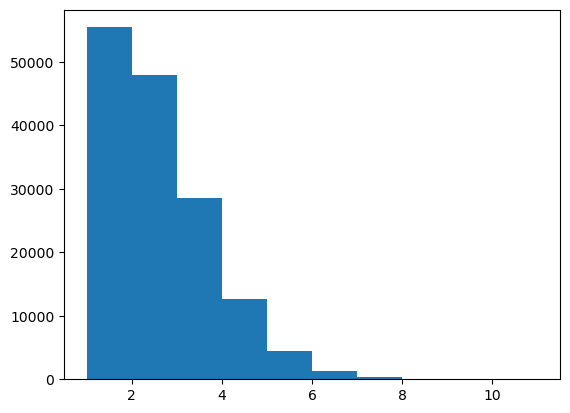

In [16]:
unique_ids, counts_true = np.unique(gal_true_id, return_counts=True)
plt.hist(counts_true);

In [17]:
unique_ids_detected, counts_detected = np.unique(gal_true_id[s], return_counts=True)

df0 = pd.DataFrame()

df0['ID'] = unique_ids
df0['counts_ins'] = counts_true

df1 = pd.DataFrame()

df1['ID'] = unique_ids_detected
df1['counts_dec'] = counts_detected

df_ = df0.merge(df1, on='ID', how='left')

In [19]:
np.isnan(df_['counts_ins']).any()

False

In [21]:
df_ = df_.fillna(value=0)
df_['det_rate'] = df_['counts_dec']/df_['counts_ins']

In [34]:
df_

,ID,counts_ins,counts_dec,det_rate
0,0,2,2.0,1.0
1,1,2,2.0,1.0
2,2,1,0.0,0.0
3,3,2,0.0,0.0
4,4,1,0.0,0.0
...,...,...,...,...
150750,181962,4,0.0,0.0
150751,181963,2,0.0,0.0
150752,181964,3,0.0,0.0
150753,181965,1,0.0,0.0


In [54]:
balrogish_df['ID']=balrogish_df['Truth_ind']

In [55]:
balrogish_df = balrogish_df.merge(df_, on='ID')

In [58]:
balrogish_df.to_csv()

,FLUX_i,FLUX_i_ERR,FLUX_r,FLUX_r_ERR,FLUX_z,FLUX_z_ERR,Truth_ind,d_arcsec,dec,detected,...,true_FLUX_i,true_FLUX_r,true_FLUX_z,true_dec,true_ra,cells,ID,counts_ins,counts_dec,det_rate
4,1714.123535,44.911205,1419.357422,41.289219,1766.226074,48.674133,12242,0.023919,-0.803763,True,...,1831.073608,1423.404297,1962.333130,-0.803757,201.491943,201,12242,2,1.0,0.5
5,3674.358398,42.898518,2791.639160,37.759289,4129.496094,80.718437,28918,0.266510,8.223158,True,...,3866.267334,2743.958008,4387.424316,8.223190,161.263550,349,28918,2,2.0,1.0
6,3307.633301,40.744179,2437.153076,38.373272,4289.316895,66.674240,28918,0.057616,8.142485,True,...,3866.267334,2743.958008,4387.424316,8.142472,161.242661,589,28918,2,2.0,1.0
8,178.212860,45.507748,149.295151,26.215754,526.742615,61.401218,64619,0.125985,7.541154,True,...,215.656754,155.770676,333.382812,7.541140,161.768372,1662,64619,4,2.0,0.5
9,475.346405,41.320454,166.602081,33.807293,801.515869,105.964874,64619,0.373114,8.217856,True,...,215.656754,155.770676,333.382812,8.217937,161.688065,575,64619,4,2.0,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320471,330.849152,28.643429,300.513672,41.455414,352.994232,39.170689,32011,0.070920,-0.614554,True,...,308.877838,256.241241,350.109955,-0.614535,201.161804,2264,32011,1,1.0,1.0
320476,152.538239,35.815826,98.759476,26.476162,485.627838,60.177029,84825,0.099169,-0.912844,True,...,153.820267,57.573956,345.738190,-0.912850,201.357193,2296,84825,1,1.0,1.0
320477,375.120026,54.198048,406.710266,47.998119,763.948547,98.815163,102426,0.101380,-0.484146,True,...,303.816650,172.216446,601.636108,-0.484173,201.435974,2231,102426,1,1.0,1.0
320479,260.293091,33.079163,88.400322,44.029556,513.806885,55.594814,58284,0.151997,-0.724034,True,...,222.710312,136.723434,387.736877,-0.724076,201.206528,1774,58284,1,1.0,1.0


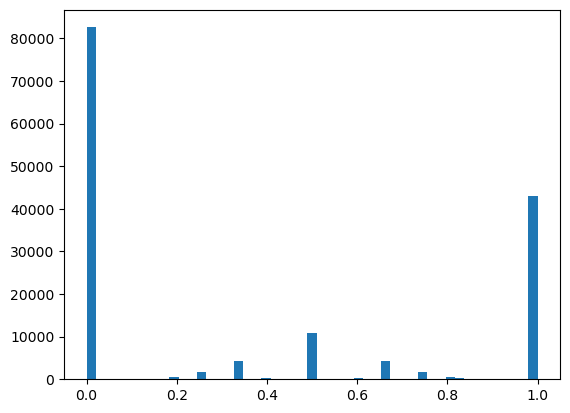

In [23]:
plt.hist(df_.det_rate, bins=np.linspace(0,1,50));

In [46]:
deep_SOM = pd.read_csv('/project/chihway/raulteixeira/data/deep_fields_nice_n_z.csv.gz')

In [50]:
deep_SOM

,Unnamed: 0,ID,RA,DEC,KNN_CLASS,BDF_FLUX_DERED_CALIB_U,BDF_FLUX_DERED_CALIB_G,BDF_FLUX_DERED_CALIB_R,BDF_FLUX_DERED_CALIB_I,BDF_FLUX_DERED_CALIB_Z,...,g-i,z-i,j-i,h-i,ks-i,zspec,paus_z,cosmos_z,Z,good_Z
0,0,692581195,52.901547,-28.866868,1.0,78.873091,90.598396,150.538655,299.158525,604.705644,...,1.296952,-0.764107,-1.621641,-2.167968,-2.400146,NaN,NaN,NaN,NaN,NaN
1,1,692581196,52.900143,-28.866868,1.0,427.218832,428.159639,533.924158,623.754924,930.088708,...,0.408521,-0.433776,-0.669181,-0.913292,-1.065940,NaN,NaN,NaN,NaN,NaN
2,2,692581197,52.919675,-28.867296,1.0,204.186270,259.924072,640.058928,923.667161,990.715877,...,1.376673,-0.076084,-0.504671,-0.420516,-0.845662,NaN,NaN,NaN,NaN,NaN
3,4,692581244,52.775273,-28.867263,1.0,30.073269,29.574921,83.823448,123.895966,123.353058,...,1.555334,0.004768,-1.101095,-0.197415,-1.925934,NaN,NaN,NaN,NaN,NaN
4,5,692581245,52.806489,-28.867570,1.0,482.933499,471.033683,666.071153,1136.945773,1345.197659,...,0.956719,-0.182616,-0.463813,-0.517894,-0.589216,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
610323,2826973,698430348,36.792257,-4.959126,1.0,36.794575,36.615140,113.136962,199.582800,329.359765,...,1.841156,-0.543869,-1.357997,-1.884968,-2.098736,NaN,NaN,NaN,NaN,NaN
610324,2826974,698430349,36.936774,-4.958946,1.0,68.959445,65.505742,173.253276,213.351412,247.441472,...,1.282040,-0.160942,-0.306512,-0.441242,-0.695710,NaN,NaN,NaN,NaN,NaN
610325,2826980,698430445,36.858459,-4.959729,1.0,171.296154,420.164719,816.936807,1086.845179,1158.868204,...,1.031870,-0.069666,-0.314095,-0.439288,-0.368006,NaN,NaN,NaN,NaN,NaN
610326,2826983,698430493,36.867956,-4.961262,1.0,62.842978,138.970283,445.022129,1069.344794,1567.993989,...,2.215490,-0.415567,-1.363364,-1.730909,-2.207312,NaN,NaN,NaN,NaN,NaN


In [48]:
np.sort(deep_SOM['ID'])

array([691667162, 691667165, 691667168, ..., 713202790, 713202803,
       713202834])

In [49]:
np.sort(gal_true_id)

array([     0,      0,      1, ..., 181964, 181965, 181967], dtype=uint32)

In [29]:
len(df_)==len(df0)

True

In [ ]:
detection_rate = 

In [ ]:
gal_true_id, detection_rate

In [ ]:
#detection probability: # times it was detected/# time it was inserted

In [5]:
y.shape

(320483,)

In [6]:
gal_true_id

array([117480,  12242,  28918, ...,  89115,  64993, 144031], dtype=uint32)

In [2]:
N=48

In [3]:
wide = pd.read_csv('/project/chihway/raulteixeira/data/BPZ+SOM_mcal_gold_wide_48x48_ids+cells+fluxes.csv.gz')
deep = pd.read_csv('/project/chihway/raulteixeira/data/deepfields_clean.csv.gz')

In [4]:
deep_SOM = pd.read_csv('/project/chihway/raulteixeira/data/deep_fields_nice_n_z.csv.gz')

In [5]:
deep['cells']=deep_SOM['cells']

In [6]:
bdf_wide = pd.read_hdf('/project2/chihway/raulteixeira/data/bdf_photometry/dr3_1_1_bdf_metacal_gold.h5', key='df')

In [7]:
wide = wide.merge(bdf_wide, on='COADD_OBJECT_ID')

In [8]:
bands = ['G', 'R', 'I', 'Z']
for band in bands:

    fluxcol = f'BDF_FLUX_DERED_CALIB_{band}'
    fluxerrcol = f'BDF_FLUX_ERR_DERED_CALIB_{band}'
    
    magcol = f'BDF_MAG_DERED_CALIB_{band}'
    magerrcol = f'BDF_MAG_ERR_DERED_CALIB_{band}'

    deep[magcol]=flux2mag(deep[fluxcol])
    deep[magerrcol]=flux2mag(deep[fluxerrcol])

In [9]:
np.unique(deep['cells']).size

2304

In [63]:
balrogish_df['cells']

0         0
1         0
2         0
3         0
4         0
         ..
129595    0
129596    0
129597    0
129598    0
129599    0
Name: cells, Length: 129600, dtype: int64

In [64]:
df['cells_wide']=df['cells_y']
df['cells_deep']=df['cells_x']

In [66]:
n=48
cmap='magma'
fun = 'mean'
feat = 'BDF_MAG_DERED_CALIB_I'
vmin,vmax=None,None#-1,3
norm=None
title = 'mean i-band flux'
square = df[[feat, 'cells_deep']].groupby('cells_deep').agg(['mean', 'median', 'std', len])
im_i = square[(feat, fun)].values.reshape(n,n)
image = plt.imshow(im_i, cmap=cmap, vmin=vmin, vmax=vmax, norm=norm)
#divider = make_axes_locatable(axes[i,j])
#cax = divider.append_axes('right', size='5%', pad=0.05)
plt.colorbar(image, orientation='vertical') # cax=cax
plt.title(f'{title}',style='italic')
plt.show()

ValueError: cannot reshape array of size 2227 into shape (48,48)

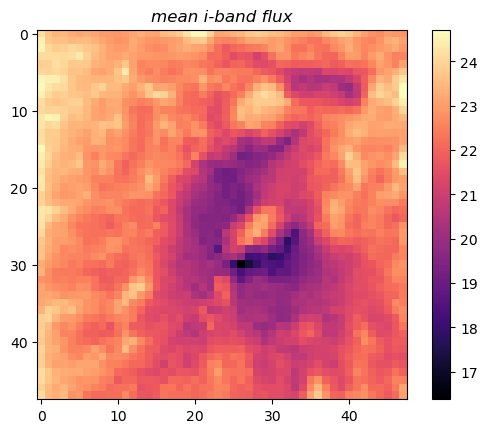

In [10]:
n=48
cmap='magma'
fun = 'mean'
feat = 'BDF_MAG_DERED_CALIB_I'
vmin,vmax=None,None#-1,3
norm=None
title = 'mean i-band flux'
square = deep[[feat, 'cells']].groupby('cells').agg(['mean', 'median', 'std', len])
im_i = square[(feat, fun)].values.reshape(n,n)
image = plt.imshow(im_i, cmap=cmap, vmin=vmin, vmax=vmax, norm=norm)
#divider = make_axes_locatable(axes[i,j])
#cax = divider.append_axes('right', size='5%', pad=0.05)
plt.colorbar(image, orientation='vertical') # cax=cax
plt.title(f'{title}',style='italic')
plt.show()

In [203]:
for band in ['r', 'i', 'z']:
    balrogish_df[f'MAG_{band}'] = flux2mag(balrogish_df[f'FLUX_{band}'])

/home/raulteixeira/.conda/envs/raul/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/raulteixeira/.conda/envs/raul/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [67]:
emptycells_deep = np.arange(0, n**2)[~np.isin(np.arange(0, n**2), df.cells_deep.values)]
emptycells_wide = np.arange(0, n**2)[~np.isin(np.arange(0, n**2), df.cells_wide.values)]

In [68]:
emptycells_deep, emptycells_wide

(array([ 648,  651,  696,  698,  699,  836,  837,  838, 1166, 1177, 1178,
        1226, 1230, 1272, 1273, 1274, 1279, 1319, 1320, 1321, 1325, 1326,
        1327, 1367, 1368, 1369, 1370, 1371, 1373, 1374, 1415, 1416, 1417,
        1418, 1419, 1420, 1463, 1464, 1465, 1466, 1467, 1468, 1469, 1470,
        1510, 1511, 1512, 1513, 1514, 1515, 1516, 1517, 1558, 1560, 1561,
        1562, 1563, 1564, 1565, 1609, 1610, 1612, 1657, 1658, 1700, 1749,
        1750, 1751, 1789, 1796, 1799, 1833, 1845, 1846, 2218, 2219, 2263]),
 array([  12,   52,   59,   60,  100,  152,  353,  357,  394,  485,  926,
         960, 1011, 1017, 1021, 1061, 1080, 1088, 1116, 1189, 1210, 1213,
        1257, 1258, 1286, 1289, 1290, 1291, 1292, 1295, 1302, 1328, 1384,
        1389, 1431, 1445, 1681, 1684, 1728, 1778, 1779, 1874, 1970, 1973]))

In [194]:
square_

,mean,median,std,len
0,793.474304,649.431641,667.220816,202409.0
1,855.749329,799.844543,126.396197,7.0
2,930.970093,1004.541321,184.690596,7.0
3,1343.371948,1222.831909,312.245617,8.0
4,1373.523926,1329.157898,175.048482,6.0
...,...,...,...,...
2299,245.885895,208.086807,168.519986,93.0
2300,515.836975,426.790359,377.059529,18.0
2301,423.822357,376.799377,173.374401,11.0
2302,409.768402,325.837540,253.297197,34.0


In [190]:
df = pd.concat([square['FLUX_i'], emptylines], ignore_index=False)

In [198]:
square_

,mean,median,std,len
0,793.474304,649.431641,667.220816,53.0
1,855.749329,799.844543,126.396197,7.0
2,930.970093,1004.541321,184.690596,7.0
3,1343.371948,1222.831909,312.245617,8.0
4,1373.523926,1329.157898,175.048482,6.0
...,...,...,...,...
2299,245.885895,208.086807,168.519986,93.0
2300,515.836975,426.790359,377.059529,18.0
2301,423.822357,376.799377,173.374401,11.0
2302,409.768402,325.837540,253.297197,34.0


In [3]:
lines = []
for cell in emptycells_deep:
    lines.append(pd.DataFrame({f"{col}": np.nan for col in square['FLUX_i'].columns}, index=[cell]))
    emptylines = pd.concat(lines, ignore_index=False)
    print(cell)
print(emptylines)
    
square['FLUX_i'] = pd.concat([square['FLUX_i'], emptylines], ignore_index=False)
square['FLUX_i'] = square['FLUX_i'].sort_index()

NameError: name 'emptycells_deep' is not defined

In [178]:
pd.concat([square['FLUX_i'], line], ignore_index=False)

,mean,median,std,len
0,793.474304,649.431641,667.220816,202409.0
1,855.749329,799.844543,126.396197,7.0
2,930.970093,1004.541321,184.690596,7.0
3,1343.371948,1222.831909,312.245617,8.0
4,1373.523926,1329.157898,175.048482,6.0
...,...,...,...,...
2300,515.836975,426.790359,377.059529,18.0
2301,423.822357,376.799377,173.374401,11.0
2302,409.768402,325.837540,253.297197,34.0
2303,220.667679,196.047287,149.928004,345.0


In [143]:
pd.concat([square['FLUX_i'], line], ignore_index=False)

,mean,median,std,len
0,793.474304,649.431641,667.220816,202409.0
1,855.749329,799.844543,126.396197,7.0
2,930.970093,1004.541321,184.690596,7.0
3,1343.371948,1222.831909,312.245617,8.0
4,1373.523926,1329.157898,175.048482,6.0
...,...,...,...,...
2300,515.836975,426.790359,377.059529,18.0
2301,423.822357,376.799377,173.374401,11.0
2302,409.768402,325.837540,253.297197,34.0
2303,220.667679,196.047287,149.928004,345.0


In [132]:
{f"{col}": np.nan for col in square['FLUX_i'].columns}

{'mean': nan, 'median': nan, 'std': nan, 'len': nan}

In [139]:
square

FLUX_i                                   
              mean       median         std       len
cells                                                
0       793.474304   649.431641  667.220816  202409.0
1       855.749329   799.844543  126.396197       7.0
2       930.970093  1004.541321  184.690596       7.0
3      1343.371948  1222.831909  312.245617       8.0
4      1373.523926  1329.157898  175.048482       6.0
...            ...          ...         ...       ...
2299    245.885895   208.086807  168.519986      93.0
2300    515.836975   426.790359  377.059529      18.0
2301    423.822357   376.799377  173.374401      11.0
2302    409.768402   325.837540  253.297197      34.0
2303    220.667679   196.047287  149.928004     345.0

[2299 rows x 4 columns]

In [128]:
line

,"('FLUX_i', 'mean')","('FLUX_i', 'median')","('FLUX_i', 'std')","('FLUX_i', 'len')"
1236,NaN,NaN,NaN,NaN


In [127]:
square.('FLUX_i', 'median')

SyntaxError: invalid syntax (3171808237.py, line 1)

In [105]:
square['FLUX_i'].loc[emptycells]=[np.nan for col in square.columns]

KeyError: "None of [Index([1015, 1021, 1062, 1112, 1236], dtype='int64', name='cells')] are in the [index]"

In [102]:
square

FLUX_i                                 
              mean       median         std     len
cells                                              
0       793.474304   649.431641  667.220816  202409
1       855.749329   799.844543  126.396197       7
2       930.970093  1004.541321  184.690596       7
3      1343.371948  1222.831909  312.245617       8
4      1373.523926  1329.157898  175.048482       6
...            ...          ...         ...     ...
2299    245.885895   208.086807  168.519986      93
2300    515.836975   426.790359  377.059529      18
2301    423.822357   376.799377  173.374401      11
2302    409.768402   325.837540  253.297197      34
2303    220.667679   196.047287  149.928004     345

[2299 rows x 4 columns]

In [83]:
emptycells = np.arange(0, n**2)[~np.isin(np.arange(0, n**2), np.unique(balrogish_df[balrogish_df['detected']].cells))]

In [85]:
balrogish_df.loc[np.isin(balrogish_df['detected'], emptycells)]

,FLUX_i,FLUX_i_ERR,FLUX_r,FLUX_r_ERR,FLUX_z,FLUX_z_ERR,Truth_ind,d_arcsec,dec,detected,...,true_FLUX_i,true_FLUX_r,true_FLUX_z,true_dec,true_ra,cells,ID,counts_ins,counts_dec,det_rate


In [11]:
wide.columns

Index(['Unnamed: 0.2', 'Unnamed: 0', 'Unnamed: 0.1', 'COADD_OBJECT_ID',
       'FLUX_R', 'FLUX_ERR_R', 'FLUX_I', 'FLUX_ERR_I', 'FLUX_Z', 'FLUX_ERR_Z',
       'cells', 'CHI_SQ', 'ID', 'M_0', 'ODDS', 'T_B', 'T_ML', 'Z_B', 'Z_B_MAX',
       'Z_B_MIN', 'Z_MEAN', 'Z_ML', 'Z_SAMP', 'Z_SIG', 'BDF_FLUX_G',
       'BDF_FLUX_ERR_G', 'BDF_FLUX_R', 'BDF_FLUX_ERR_R', 'BDF_FLUX_I',
       'BDF_FLUX_ERR_I', 'BDF_FLUX_Z', 'BDF_FLUX_ERR_Z'],
      dtype='object')

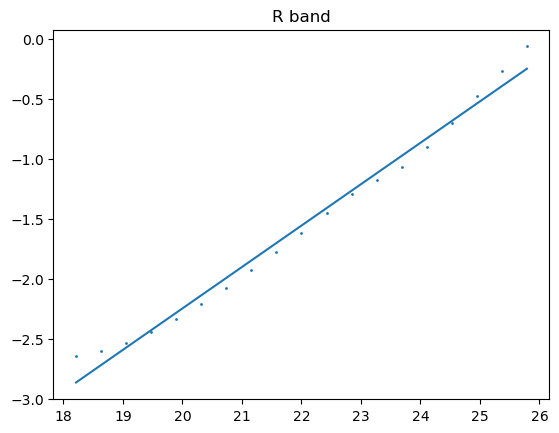

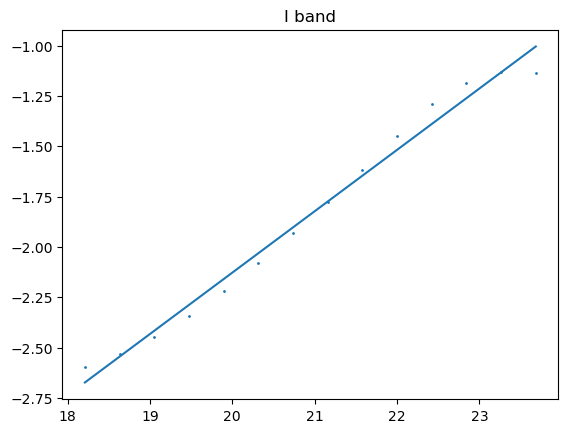

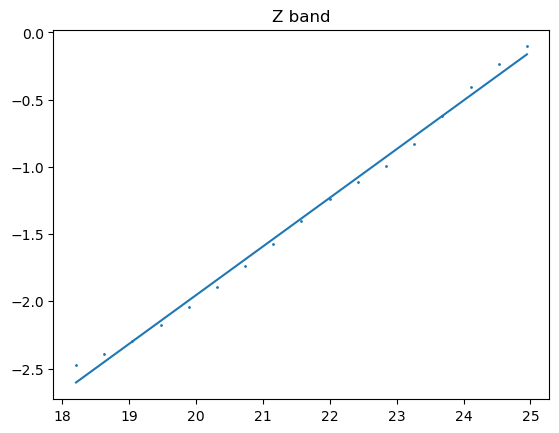

In [12]:
bands = ['R', 'I', 'Z']

linregs = {}
for band in bands:
    feat_x = f'FLUX_{band}'
    feat_y = f'FLUX_ERR_{band}'
    y = wide[feat_y]
    x = wide[feat_x]
    mags = flux2mag(np.abs(x))
    
    median_error, bin_edges, binnumber = scipy.stats.binned_statistic(mags, np.log10(np.abs(y/x)), bins=np.linspace(18,26,20), statistic='median')
    mask = np.isfinite(median_error)
    median_error = median_error[mask]
    bin_centers = np.array([.5*(bin_edges[i] + bin_edges[i+1]) for i in range(len(bin_edges)-1)])[mask]
    
    plt.figure()
    plt.title(f'{band} band')
    plt.scatter(bin_centers, median_error, s=1)
    
    linregs[band] = scipy.stats.linregress(bin_centers, median_error)
    plt.plot(bin_centers, bin_centers*linregs[band].slope+linregs[band].intercept)
    plt.show()

In [17]:
#sampling
def linerr(x, linregs=linregs, band='I'):
    return linregs[band].slope*x+linregs[band].intercept

fluxes = np.zeros((len(deep), 3))
mags = np.zeros((len(deep), 3))
for i, band in enumerate(bands):
    mags[:,i] = deep[f'BDF_MAG_DERED_CALIB_{band}'].values
    fluxes[:,i] = deep[f'BDF_FLUX_DERED_CALIB_{band}'].values
# samples = {}
# np.random.seed(seed=42)
# for i, band in enumerate(bands):
#     samples[band] = np.array([np.random.normal(loc=fluxes[:,i],\
#                                       scale=fluxes[:,i]*(10**linerr(mags[:,i])),\
#                                       size=fluxes.shape[0]) for blorg in range(100)])#, 100))
with open('/project/chihway/raulteixeira/data/samples_deep2wide.pkl', 'rb') as f:
    samples = pkl.load(f)

In [14]:
# with open('/project/chihway/raulteixeira/data/samples_deep2wide.pkl', 'wb') as f:
#     pkl.dump(samples, f)
#     print('saved')

In [18]:
# count how many galaxies pass the metacal cuts
# histogram to compare distributions 2d contour triangle plot

flux_r, flux_i, flux_z = (samples[band] for band in bands)

# flux_err_r, flux_err_i, flux_err_z = np.array(f['mcal_flux_err_noshear']).T
mag_r = flux2mag(flux_r)
mag_i = flux2mag(flux_i)
mag_z = flux2mag(flux_z)

mcal_pz_mask = ((mag_i < 23.5) & (mag_i > 18) & 
                (mag_r < 26)   & (mag_r > 15) & 
                (mag_z < 26)   & (mag_z > 15) & 
                (mag_r - mag_i < 4)   & (mag_r - mag_i > -1.5) & 
                (mag_i - mag_z < 4)   & (mag_i - mag_z > -1.5))

SNR = np.sqrt((flux_i/(fluxes[:,1]*(10**linerr(mags[:,1]))))**2\
+ (flux_r/(fluxes[:,0]*(10**linerr(mags[:,0]))))**2 + (flux_z/(fluxes[:,2]*(10**linerr(mags[:,2]))))**2)#calculate another way, divide flux/fluxerr

#Metacal cuts based on DES Y3 ones (from here: https://des.ncsa.illinois.edu/releases/y3a2/Y3key-catalogs)
SNR_Mask = (SNR > 10) & (SNR < 1000)

Mask = mcal_pz_mask & SNR_Mask

/tmp/ipykernel_13933/628128038.py:2: RuntimeWarning: invalid value encountered in log10
  return -2.5 * np.log10(flux) + 30


In [8]:
import scipy.optimize as so
from scipy.ndimage import gaussian_filter

def find_confidence_interval(x, pdf, confidence_level):
    return pdf[pdf > x].sum() - confidence_level

def density_contour(xdata, ydata, bins_x, bins_y, ax=None, smooth=False, level=0.68, weights=None, **contour_kwargs):

    nbins_x = len(bins_x) - 1
    nbins_y = len(bins_y) - 1
    H, xedges, yedges = np.histogram2d(xdata, ydata, bins=(bins_x,bins_y), density=1, weights=weights)
    x_bin_sizes = (xedges[1:] - xedges[:-1]).reshape((1,nbins_x))
    y_bin_sizes = (yedges[1:] - yedges[:-1]).reshape((nbins_y,1))

    if smooth:
        H = gaussian_filter(H, 1.0, )
    pdf = (H*(x_bin_sizes*y_bin_sizes))

    one_sigma = so.brentq(find_confidence_interval, 0., 1., args=(pdf, level))
    levels = [one_sigma]

    X, Y = 0.5*(xedges[1:]+xedges[:-1]), 0.5*(yedges[1:]+yedges[:-1])
    Z = pdf.T

    if ax == None:
        contour = plt.contour(X, Y, Z, levels=levels, origin="lower", **contour_kwargs)
    else:
        contour = ax.contour(X, Y, Z, levels=levels, origin="lower", **contour_kwargs)

    return contour

In [12]:
#r_i = (mag_r-mag_i)[Mask]
#i_z = (mag_i-mag_z)[Mask]

r_i = (flux2mag(y_r[np.isfinite(y_i)])-flux2mag(y_i[np.isfinite(y_i)]))
i_z = (flux2mag(y_i[np.isfinite(y_i)])-flux2mag(y_z[np.isfinite(y_i)]))

/tmp/ipykernel_4270/3974690616.py:2: RuntimeWarning: invalid value encountered in log10
  return -2.5 * np.log10(flux) + 30


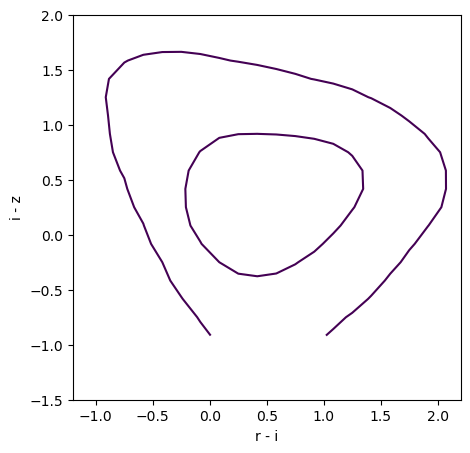

In [26]:
plt.figure(figsize=(5,5))
plt.xlim(-1.2,2.2)
plt.ylim(-1.5,2)
plt.xlabel('r - i')
plt.ylabel('i - z')
c_ri_iz_68 = density_contour(r_i.flatten(), i_z.flatten(), bins_x=np.linspace(-1, 3, 25), bins_y=np.linspace(-1, 3, 25), level=0.68, smooth=True)
c_ri_iz_95 = density_contour(r_i.flatten(), i_z.flatten(), bins_x=np.linspace(-1, 3, 25), bins_y=np.linspace(-1, 3, 25), level=0.95, smooth=True)
plt.show()

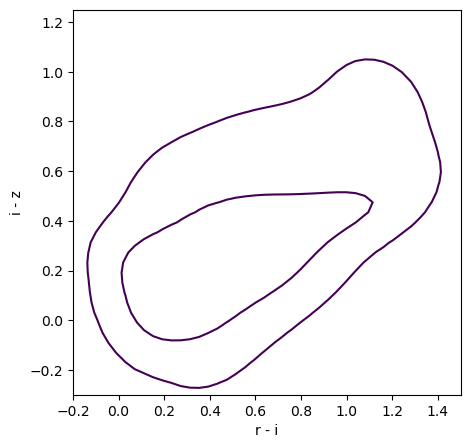

In [31]:
plt.figure(figsize=(5,5))
plt.xlim(-.2,1.5)
plt.ylim(-.3,1.25)
plt.xlabel('r - i')
plt.ylabel('i - z')
c_ri_iz_68 = density_contour(r_i.flatten(), i_z.flatten(), bins_x=np.linspace(-1, 3, 100), bins_y=np.linspace(-1, 3, 100), level=0.68, smooth=True)
c_ri_iz_95 = density_contour(r_i.flatten(), i_z.flatten(), bins_x=np.linspace(-1, 3, 100), bins_y=np.linspace(-1, 3, 100), level=0.95, smooth=True)
plt.show()

In [14]:
#flux_i*(10**linerr(23.8))

In [13]:
#plt.hist(flux2mag(samples['I']), bins=30);

In [ ]:
#classifying samples, assign the ones that passed to the wide SOM